# Библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from IPython.display import Image

In [3]:
import math

import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

In [4]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
from numpy import random

In [5]:
import plotly.express as px
import plotly.graph_objects as go

# Линеная регрессия

[5 видов регрессии и их свойства](https://medium.com/nuances-of-programming/5-видов-регрессии-и-их-свойства-f1bb867aebcb)

- В регрессии число степеней свободы определяется количеством факторных признаков m,
- для Остаток ‒ числом наблюдений n и количеством переменных в уравнении регрессии m + 1: n ‒ (m + 1), 

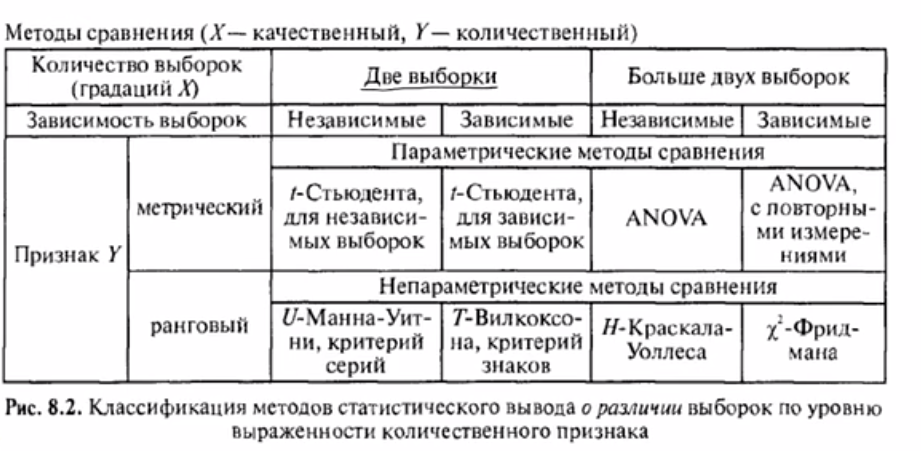

In [6]:
Image(filename='фото//output13.png')

**Основные допущения линейной регрессии**:
 - линейная связь между ЗП и НП
 - независомть наблюдейний 
 - независимость предикторов (проблема мультиколлинеарности)
 - Гомоскедастичность
 - номальное распредление остатков 
 - Отсутвие автокореляции в остатках 

<div class="alert alert-warning">
<h2> Линейные взаимосвязи </h2>
</div>

Трансформация Тьюки: основная идея трасформировать НП, чтобы ликвидировать нелинейность связи

Можно каждую из переменных возводить в степень, чтобы повысить R^2, то теряется интерпретация

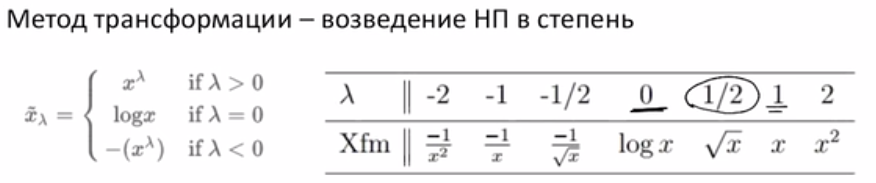

In [7]:
Image(filename='фото//output14.png')

In [8]:
mtcars = pd.read_csv('data//mtcars.csv')
mtcars.head(2)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


При возведении в орицательную степень, дополнительно нужно умножить на минус 1 (рисунок 3 не правильный

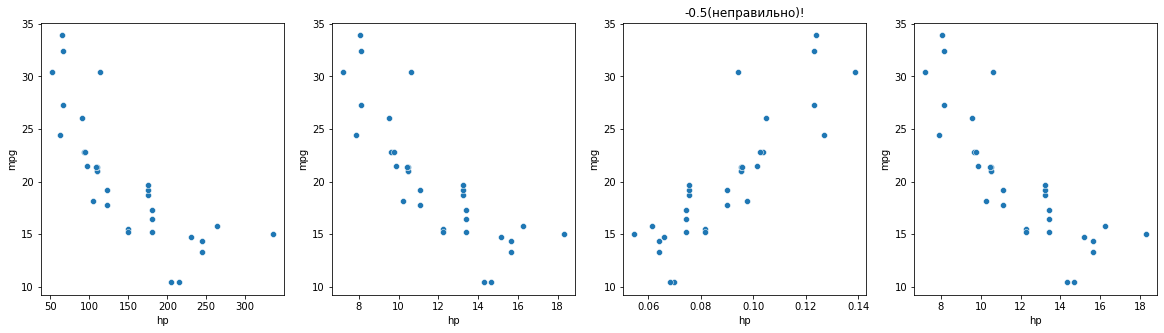

In [9]:
fig, axes = plt.subplots(1, 4, figsize = (20, 5))
for i, power  in enumerate([1, 1/2, -1/2, 1/2]):
    sns.scatterplot(y = mtcars['mpg'], x = mtcars['hp'] ** power * (-1 if i ==4 else 1), ax= axes[i])
    axes[i].set_title(str(power) + '(неправильно)!' if i == 2 else '' )

In [10]:
from scipy.stats.stats import pearsonr

In [11]:
# построим график взаимосвязи степени в которую надо возвести данные и корреляцией
box =[]
for i in np.arange(-5, 5, 0.01):
    if i == 0:
        corr_pers, p_value = pearsonr(mtcars['mpg'],  np,log(mtcars['hp']))
    else:
        corr_pers, p_value = pearsonr(mtcars['mpg'],  mtcars['hp'] ** i * (-1 if i <0 else 1))
    box.append([i, corr_pers**2])
corr_table = pd.DataFrame(box, columns = ['power', 'corr_coeff'])

0.7443802217195634

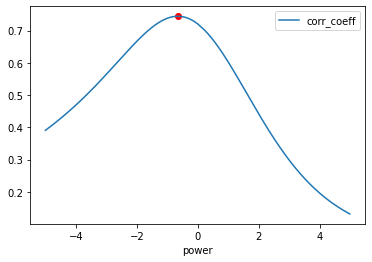

In [12]:
# график корреляции и степни
max_corr =corr_table['corr_coeff'].max()
corr_table.plot(x ='power', y ='corr_coeff')
plt.scatter(x =corr_table.query('corr_coeff == @max_corr')['power'].max(), y =max_corr, c ='r')
max_corr

<AxesSubplot:xlabel='hp', ylabel='mpg'>

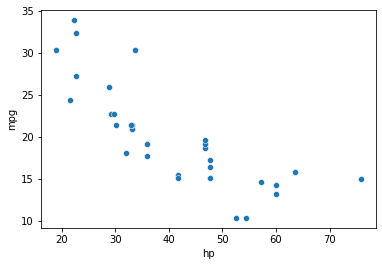

In [13]:
# результаты возведения в степень
sns.scatterplot(y = mtcars['mpg'], x = mtcars['hp'] ** max_corr * (-1 if max_corr < 0 else 1))

**Вывод:**
- результаты сложно интерпретировать ( за исключением логарифмирования)
- может быть переобучение

Трансформация переменных - хорошее решение, если мы хотим добиться линейной взаимосвязи между переменными. Индикатором нелинейной взаимосвязи между переменными может служить  ненормальное распределение остатков регрессии. При помощи трансформации Тьюки мы подбираем такой показатель степени, при котором  абсолютное значение корреляции
 между переменными X и Y будет максимальным.


<div class="alert alert-warning">
<h2> Логарифмическая трансформация переменных </h2>
</div>

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
y_ = np.log(mtcars.loc[:,'mpg'])   
x_ = np.log(mtcars.loc[:,'hp'])   

x_ = sm.add_constant(x_)

ols = sm.OLS(y_, x_)
res = ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     75.53
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.08e-09
Time:                        09:14:49   Log-Likelihood:                 13.992
No. Observations:                  32   AIC:                            -23.98
Df Residuals:                      30   BIC:                            -21.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5454      0.299     18.538      0.0

In [15]:
# интрепритация коэффициента при hp: при единичном увеличении  hp на 1% mpg уменьшится на -0.5301%

In [16]:
#остатки

mtcars['resid']= res.resid
# предсказанные
mtcars['pred'] = res.predict()

Text(0.5, 1.0, 'гистограма остатков')

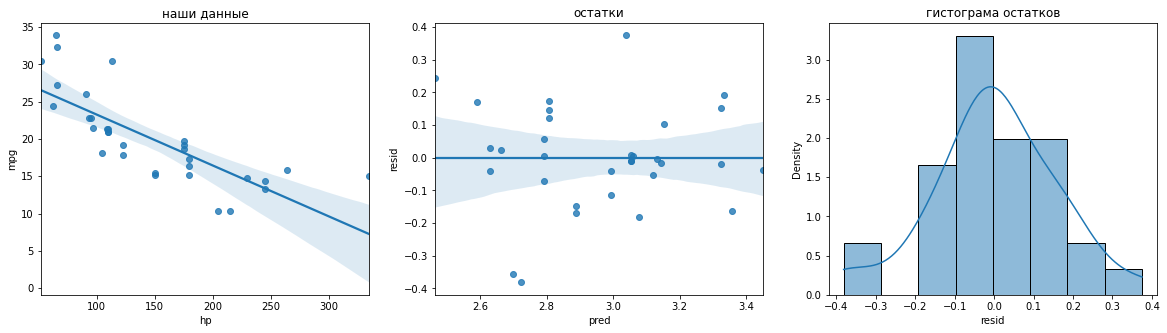

In [17]:
fif, axes = plt.subplots(1, 3, figsize = (20, 5))
# построиг решрессионную прямую через наши данные
sns.regplot(x=mtcars['hp'], y=mtcars['mpg'] ,ax= axes[0])
sns.regplot(y=mtcars['resid'], x=mtcars['pred'] ,ax= axes[1])
sns.histplot(data = mtcars, x ='resid', kde = True, stat="density")
axes[0].set_title('наши данные')
axes[1].set_title('остатки')
axes[2].set_title('гистограма остатков')

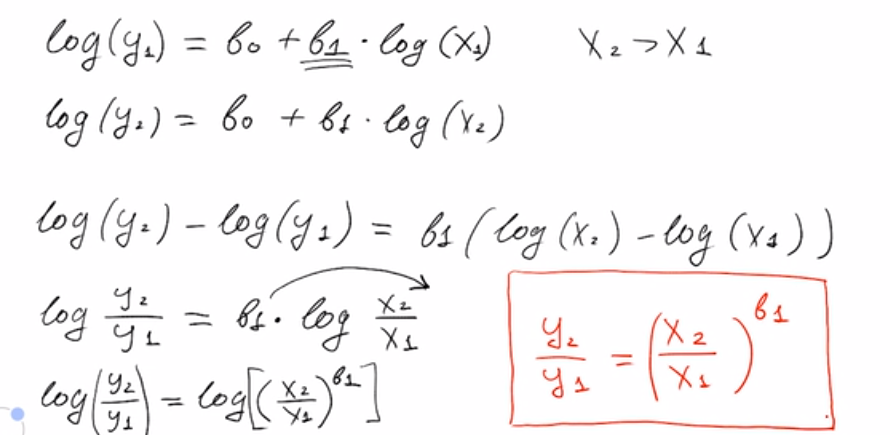

In [18]:
# b_1 показывает на сколько процентов увеличивается значения исходной при увеличении предикторов на 1 процент и  это говорит о нелинейной взаимосвязи
Image(filename='фото//output15.png')

В модели $log(Y)=b_1*X+b_0 $ коэффициент наклона означает: при единичном изменении переменной X, переменная Y в среднем изменяется на $100*b_1$
процентов.

В модели $Y=b_1*log(X)+b_0$   коэффициент наклона означает:  изменение на 1% по X в среднем приводит к изменению переменной Y на $0.01∗b_1$ единиц.

Строго говоря, в модели $log(Y)=b1∗X+b0$ при увеличении XX на единицу переменная YY в среднем изменится на $100(e^{b_1}-1)$ процентов. Выражение $100∗b_1$ можно рассматривать лишь как линейное приближение точного выражения при значениях $b_1$  близких к нулю.

Точно так же в модели $log(Y)=b1∗log(X)+b0$ при увеличении XX на 1% переменная YY в действительности изменится на $100((101/100)^{b_1}-1)$ процентов, что мало отличается от $b_1$ только при $b_1$, близких к нулю. Например, уже при b$_1=100b$ приращение Y составит не 100%, а около 170%. С увеличением $b_1b$ по модулю расхождение между указанными выражениями будет возрастать неограниченно.  

In [19]:
'''
В исследовании проверялась гипотеза о взаимосвязи мотивации студентов и денежного вознаграждения за проделанную работу. Исходные переменные оказались 
взаимосвязанными нелинейно, поэтому независимая переменная — денежное вознаграждение — была прологарифмирована (использовался натуральный логарифм). 
В результате была получена следующая модель:

мотивация = 120*log(вознаграждение) + 3мотивация=120∗log(вознаграждение)+3

Укажите, на сколько единиц в среднем увеличивается мотивация при увеличении вознаграждения на 10 процентов.  В ответе укажите целое число и не забывайте 
о правилах округления.
'''

'\nВ исследовании проверялась гипотеза о взаимосвязи мотивации студентов и денежного вознаграждения за проделанную работу. Исходные переменные оказались \nвзаимосвязанными нелинейно, поэтому независимая переменная — денежное вознаграждение — была прологарифмирована (использовался натуральный логарифм). \nВ результате была получена следующая модель:\n\nмотивация = 120*log(вознаграждение) + 3мотивация=120∗log(вознаграждение)+3\n\nУкажите, на сколько единиц в среднем увеличивается мотивация при увеличении вознаграждения на 10 процентов.  В ответе укажите целое число и не забывайте \nо правилах округления.\n'

mean = 11.437221576518937


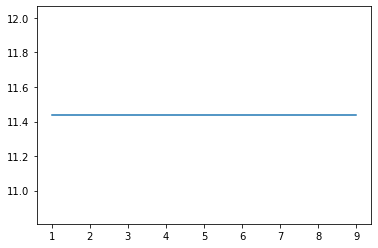

In [20]:
def add_10_percent(x1):
    res1 = 120 * np.log(x1) + 3
    res2 = 120 * np.log(x1 * 1.1) + 3
    return res2 - res1

print('mean =', add_10_percent(10)) #mean = 11.437221576518937

plt.plot(range(1,10,1), 
         [add_10_percent(i) for i in range(1,10, 1)])

In [21]:
def simul():
    cnt = 365
    number = range(cnt)

    fix = np.random.normal(60, 10, int(1*cnt/2))
    time1 = np.hstack((fix, np.random.normal(60, 10, int(1*cnt/2))))
    time2 = np.hstack((fix, np.random.normal(10, 90, int(1*cnt/2))))

    data = pd.date_range(start='1/1/2018',  periods=cnt)


    simulation_time1 = pd.DataFrame(zip(data, time1), columns=['data', 'time'])
    simulation_time2 = pd.DataFrame(zip(data, time2), columns=['data', 'time'])

    simulation_time1['month'] = simulation_time1['data'].dt.month
    simulation_time2['month'] = simulation_time2['data'].dt.month
    
    med1 = simulation_time1.pivot_table(index = 'month', values = 'time', aggfunc =np.mean).reset_index()
    med1['number'] = 1
    med2 = simulation_time2.pivot_table(index = 'month', values = 'time', aggfunc =np.mean).reset_index()
    med2['number'] = 2
    med= pd.concat([med1, med2])
    
    fig, axes = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(data =simulation_time1, x ='time' , kde=True, ax= axes[0], stat="density")
    sns.histplot(data =simulation_time2, x= 'time' ,kde=True, ax= axes[1],stat="density")

    fig, axes = plt.subplots(1, 1, figsize = (20, 5))
    ax = sns.lineplot(data=med, x="month", y="time", hue="number")

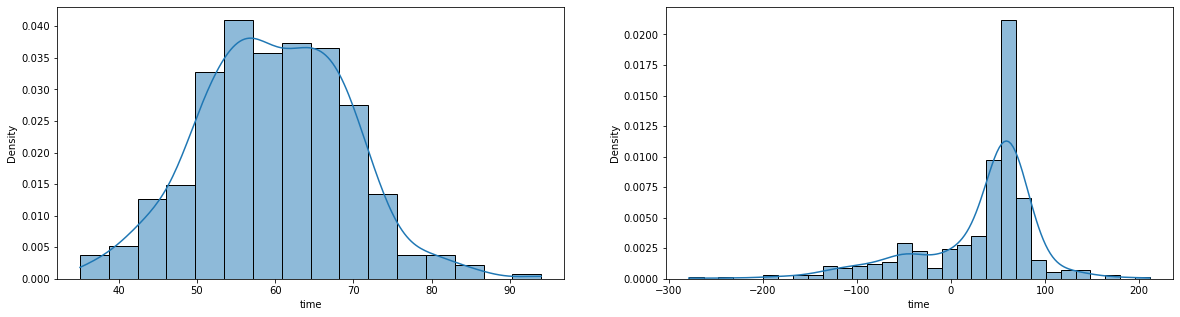

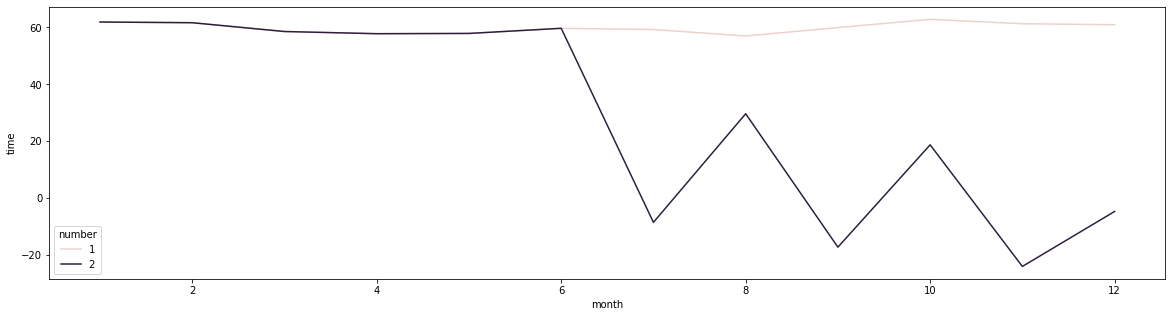

In [22]:
simul()

Трансформация Бокса — Кокса (Box-Cox transformation) — широко используемый метод трансформации данных. В контексте регрессии он обычно используется для трансформации зависимой переменной в случае, если у нас есть ненормальное распределение ошибок и/или нелинейность взаимосвязи, а также в случае гетероскедастичности.

Идея трансформации очень простая:

$\large y_{new}=\frac{y^p - 1}{p}$ если $\large p \neq 0$

$\large y_{new} = log(y)$ если если $p = 0$

Параметр p подбирается по схожей идее: мы будем использовать то p, при котором качество модели максимально (обычно используется метод максимального правдоподобия). 

Например, в случае множественной регрессии мы можем трансформировать зависимую переменную, чтобы добиться более высокого качества модели и выполнения требования к данным.

**Инструкция:**
   - проверить есть ли дейсвительно линейная завимость можно проведя трансформацию Тьюки, если коэффициент дитерминации увеличивается (сильно увеличивается), то говорить о линейности взаимосвязи не приходится
   - проверить остки на нормальность

<div class="alert alert-warning">
<h2> Проблема гетероскедастичности</h2>
</div>

In [23]:
np.random.seed(1000)

In [24]:
# импортирует датасет о брилиантах
diamonds = pd.read_csv('data//diamonds.csv').sample(400).reset_index()

<AxesSubplot:xlabel='price', ylabel='carat'>

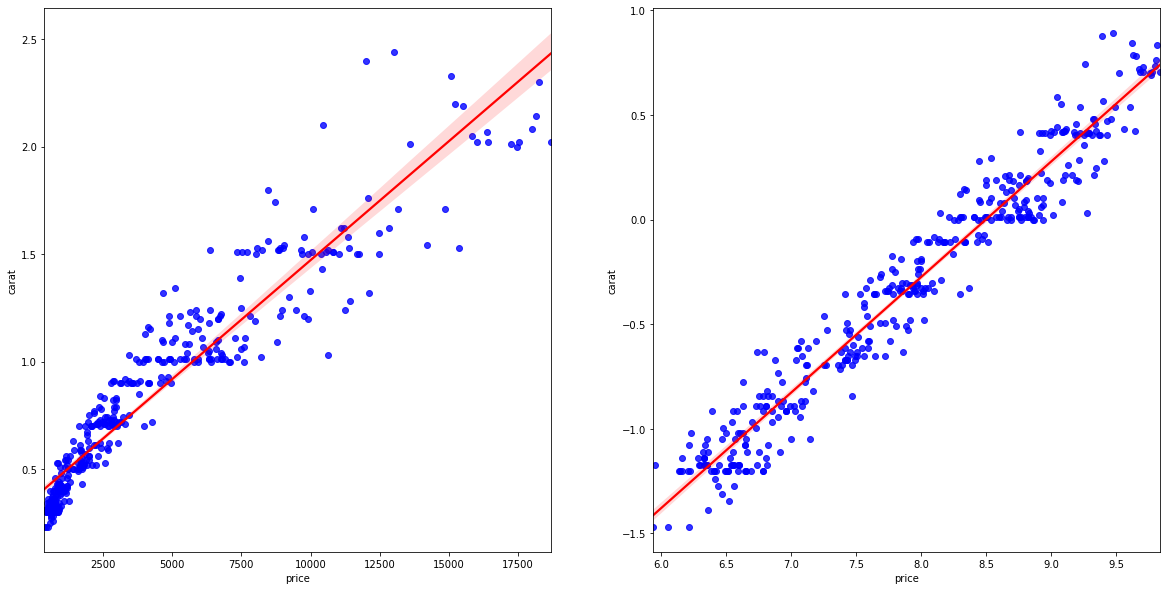

In [25]:
# постром график
# после какого-то значения мы видим широкий веер данных (значит проблема гетероскедастичности):дисперсия
fig, ax = plt.subplots(1, 2, figsize =(20, 10))
sns.regplot(x = diamonds['price'] , y =diamonds['carat'] ,
            scatter_kws={"color": "blue"}, line_kws={"color": "red"} , ax = ax[0])
# извлекаем логарифм
sns.regplot(x = np.log(diamonds['price']) ,y = np.log(diamonds['carat']) ,
            scatter_kws={"color": "blue"}, line_kws={"color": "red"} ,ax= ax[1])

In [26]:
y_ = sm.add_constant(diamonds['price']) # зависимая переменная
x_ = diamonds['carat']
ols = sm.OLS(endog = x_, 
            exog= y_ )

res = ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     3412.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          2.56e-197
Time:                        09:14:51   Log-Likelihood:                 173.51
No. Observations:                 400   AIC:                            -343.0
Df Residuals:                     398   BIC:                            -335.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3645      0.011     32.202      0.0

In [27]:
# при единичном увеличении цены кол-во карат увеличится в 0.0001 

Какие проблемы дает гетероскедастичности?
 - оценки МНК для коэффициентов  не оптимальны (вичислительная часть) - падает качесво регресии
 - влияет на интерпритацию

In [28]:
#остатки

diamonds['resid']= res.resid
# предсказанные
diamonds['pred'] = res.predict()

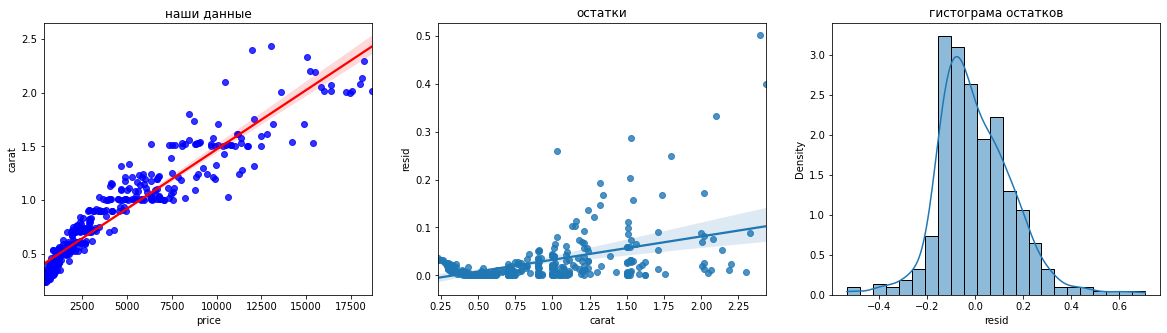

In [29]:
fif, axes = plt.subplots(1, 3, figsize = (20, 5))
# построиг решрессионную прямую через наши данные
sns.regplot(x = diamonds['price'] ,y = diamonds['carat'] ,
            scatter_kws={"color": "blue"}, line_kws={"color": "red"} ,ax= axes[0])
sns.regplot(y=diamonds['resid']**2, x=diamonds['carat'] ,ax= axes[1])
sns.histplot(data = diamonds, x ='resid', kde = True, stat="density")
axes[0].set_title('наши данные')
axes[1].set_title('остатки')
axes[2].set_title('гистограма остатков')
plt.show()

In [30]:
# остатки должны быть равноверно распредлены около нуля
# Если мы построим регрессию, где зависимой переменной будет квадрат остатков модели y ~ x, а независимой переменной будет предиктор x, и в этой модели окажется
# высокий и значимый R квадрат, это означает, что в данных есть гетероскедастичность

In [31]:
# построим регрессю на квадраты осттков
# если будет высокий R^2 это говорит о том, что есть гетероскидантичность 
y_ = sm.add_constant(diamonds['resid']**2) # зависимая переменная
x_ = diamonds['price'] # предиктор( независисмая переменная)
ols = sm.OLS(endog = x_, 
            exog= y_ )

res2 = ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     3412.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          2.56e-197
Time:                        09:14:52   Log-Likelihood:                 173.51
No. Observations:                 400   AIC:                            -343.0
Df Residuals:                     398   BIC:                            -335.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3645      0.011     32.202      0.0

**Сondition number** - Число обусловленности
. В линейной регрессии число обусловленности может использоваться в качестве диагностики для мультиколлинеарности

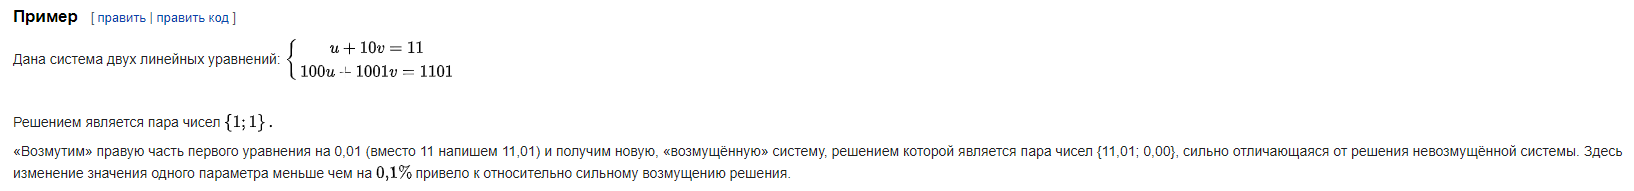

In [32]:
Image(filename='фото//output16.png')

In [33]:
# Проверьте критерием Бройша-Пагана гомоскедастичность ошибки в построенной модели. 
from statsmodels.stats.diagnostic import het_breuschpagan
p_value = het_breuschpagan(res.resid, res.model.exog)[1]
print("Breusch-Pagan test: p=%f" % p_value)

Breusch-Pagan test: p=0.000000


In [34]:
def summary(p_value):
    alfa = .005
    print(f'p_value = {p_value}')
    if p_value > alfa:
        print('Принять нулевую гитотезу о том, что зависимости во вспомогательной переменной нет (условная гомоскедастичность)')
    else:
        print('Отвергунуть нулевую гипотезу о том, что зависимости во вспомогательной переменной нет (условная гетероскедастичность )')
    print()

In [35]:
summary(p_value)

p_value = 2.790264578320891e-15
Отвергунуть нулевую гипотезу о том, что зависимости во вспомогательной переменной нет (условная гетероскедастичность )



In [36]:
# тест Уайта
import statsmodels.stats.api as sms
p_value = sms.het_white(res.resid,res.model.exog)[1]
summary(p_value)

p_value = 2.796920624193306e-14
Отвергунуть нулевую гипотезу о том, что зависимости во вспомогательной переменной нет (условная гетероскедастичность )



`Статистически значимый это всегда, p < 0.05`

<div class="alert alert-warning">
<h2> Мультиколлинеарность. </h2>
</div>

Коэффициенты регресии показывают во сколько раз изменится зависимая переменная при единичном изменении предиктора в том случае, если все другие остались без изменений. А если предикторы связаны, то при изменении одного изменится другой, а значит коэффициенты не состоятельны

- Мультиколлинеарность завышает $R^2$
- Если мы хотим предсказывать, то мультиколлинеарность - ОК, если мы хотим интерпритировать коэффициенты - то не ОК

Если между некоторыми независимыми переменными есть корреляция равная единице, то мы не сможем однозначно рассчитать все коэффициенты наклона для независимых переменных.

Вы можете обнаружить высокую мультиколлинеарность, проверив собственные значения корреляционной матрицы. Очень низкое собственное значение показывает, что данные коллинеарны, а соответствующий собственный вектор показывает, какие переменные коллинеарны.


In [37]:
y_ = sm.add_constant(diamonds['price']) # зависимая переменная
# добавим полный дубликат переменной price
y_['price2'] = y_['price']
x_ = diamonds['carat']
ols = sm.OLS(endog = x_, 
            exog= y_ )

res = ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     3412.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          2.56e-197
Time:                        09:14:52   Log-Likelihood:                 173.51
No. Observations:                 400   AIC:                            -343.0
Df Residuals:                     398   BIC:                            -335.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3645      0.011     32.202      0.0

**Jarque-Bera (JB)** - Тест Ха́рке—Бе́ра  — это статистический тест, проверяющий ошибки наблюдений на нормальность посредством сверки их третьего момента (асимметрия) и четвёртого момента (эксцесс) с моментами нормального распределения, у которого ${\displaystyle S=0}$, ${\displaystyle K=3}$

**Omnibus** : value close to Zero, to indicate normal distribution of error

**Prob(Omnibus)**: Value must be close to 1 for normal error distribution

**Skew**: Same as above, close to zero

**Condition Number**– Indicates multicollinearity, so it must be relatively small number,something below 30.


**Adj. R-squared** $= \frac{(1- 1-R²)(N-1)}{N-p-1} $ Он наказывает вас за добавление независимой переменной, которая не помогает в прогнозировании зависимой переменной.

<div class="alert alert-warning">
<h2> Мультиколлинеарность 2. </h2>
</div>

Рассмотрим формулу оценки дисперсии коэффициентов:
 - $s^2$ - это дисперсия остатков модели
 - $\hat{var(X_j)}$ - - это дисперсия зависимой переменно

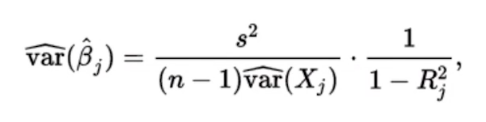

In [473]:
from PIL import Image as ImagePIL
from urllib.request import urlopen
url ='https://ucarecdn.com/2f0bcc74-f2e7-4f36-8545-456cc001785c/'

image = ImagePIL.open(urlopen(url))
image

Модель с мультиколлинеарностью даст неплохую апроксимацию переменной Y, но
 - очень сильно увеличивается стандартная ошибка каждого коэффициента
 - доверительные интервалы для каждого коэффициентов увеличивается
 - коэффициент может оказаться не значимым (хотя значимым должен быть)

In [39]:
from statsmodels.formula.api import ols
swiss = pd.read_csv('data//swiss.csv')
swiss.rename(columns = {'Infant.Mortality':'Infant_Mortality'}, inplace =True)
model = ols('Fertility ~ Examination+Agriculture+Education+Catholic+Infant_Mortality', data=swiss).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.59e-10
Time:                        09:14:54   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.9152     10.706  

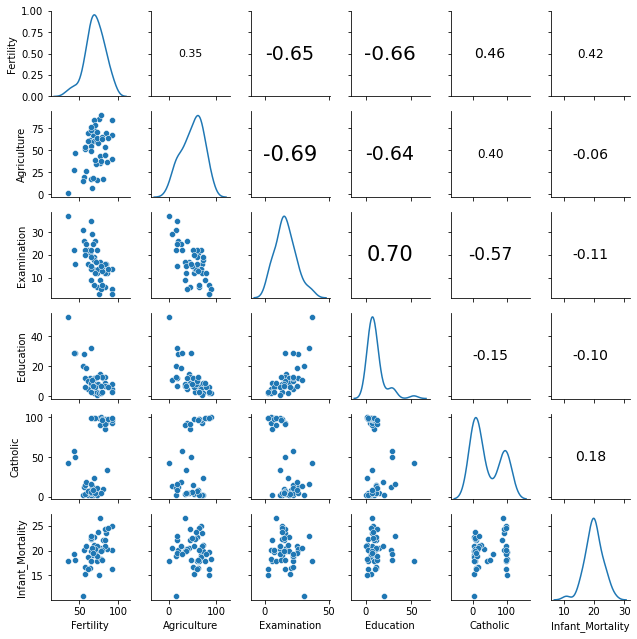

In [40]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    if abs(coef) <= 0.25:
        fontsize = 14
    else:
        fontsize = round(30*abs(coef))
    ax.annotate(
        "%.2f" %coef, (0.5, 0.5), xycoords='axes fraction'
        , ha='center', va='center', fontsize=fontsize
    )
    

g = sns.PairGrid(swiss, diag_sharey=False, height=1.5)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

<AxesSubplot:xlabel='resid', ylabel='Density'>

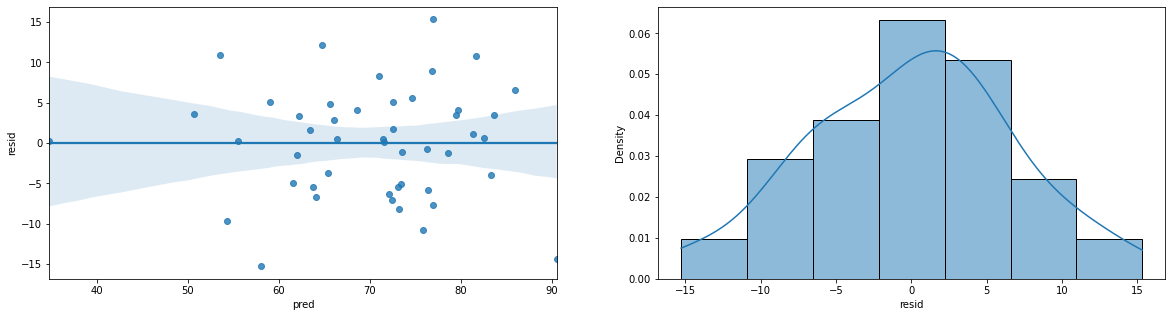

In [41]:
#остатки

swiss['resid']= model.resid
# предсказанные
swiss['pred'] = model.predict()
# из скэтер плота с нанесенным трендом видно, что в остатках 
fif, axes = plt.subplots(1, 2, figsize = (20, 5))
# гетерскедастичности нет
sns.regplot(data = swiss, x ='pred', y= 'resid', ax =axes[0])
# остатки моедли имеет не нормально распределение
sns.histplot(data = swiss, x = 'resid', ax =axes[1], kde = True, stat="density")

VIF- это сокращение от variance inflation factor, что и означает множитель, который. увеличивает дисперсию. Имеется в виду увеличение дисперсии по сравнению с тем, какой. бы она была в случае однофакторной регрессии

VIF - коэффициент вздутой дисперсии = $\frac{1}{1-R_j^2}$ - показывает насколько хорошо выбранный предиктор обЪясняется други предикторами

Если VIF переменной больше 10, то переменную можно исключить, что соответвует $x = ± \frac{3}{\sqrt10}$ что соответсвует $R^2$ равному

In [42]:
3/np.sqrt(10)

0.9486832980505138

<AxesSubplot:>

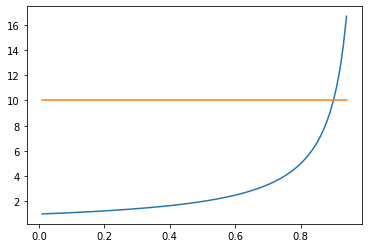

In [43]:
r_squared = np.arange(0.01, 3/np.sqrt(10), 0.01)
vif = 1/(1- r_squared)
sns.lineplot(x= r_squared,
            y = vif)
sns.lineplot(x= r_squared,
            y = 10)

* Квадратный корень VIF показывает, во сколько раз больше стала
стандартная ошибка данного коэффициента, по сравнению с
ситуацией, если бы данный предиктор был бы абсолютно
независим от других предикторов.

* Пример
Если при некотором предикторе VIF равен 5.27 (sqrt(5.27) = 2.3) это
означает, что стандартная ошибка этого коэффициента в 2.3 раза
больше, по сравнению с ситуацией, когда этот предиктор был бы
нескоррелирован с другими.

In [44]:
# рассчитываем VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('Fertility ~ Examination+Agriculture+Education+Catholic+Infant_Mortality', 
                 swiss, return_type='dataframe')


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(f'VIF:{vif.T}')

VIF:                     0            1            2          3         4  \
VIF Factor  104.924833      3.67542     2.284129   2.774943   1.93716   
features     Intercept  Examination  Agriculture  Education  Catholic   

                           5  
VIF Factor          1.107542  
features    Infant_Mortality  


**Вывод**:
 - мультиколлленирность -> рост R^2
 - гетерскедастичность -> снижение R^2

# Смешанные регрессии

<div class="alert alert-warning">
<h2> Нарушение допущения о независимости наблюдений </h2>
</div>

`Все ошибки наблюдения подразделяются на два вида:`
 - ошибки регистрации;
 - ошибки репрезентативности (представительности).

**Ошибки регистрации** возникают вследствие неправильного установления фактов в процессе наблюдения или неправильной их записи. Ошибки регистрации могут возникать как при сплошном наблюдении, так и при несплошном и имеют следующие виды:

 - случайные;
 - систематические.

Случайные ошибки – это ошибки, которые возникают в результате небрежной описки или невнимательного отношения регистратора при заполнении формуляра (ошибки в подсчёте).

Систематические ошибки – это ошибки, которые искажают сведения по каждой отдельной единице наблюдения в одном и том же направлении.

Если в эксперимент попадет сисетемная ошибка, то среднее или медианное значение будеи сдвинуто в сторону этой групповой ошибки

Каждое наблюдение - реальный показаль. Но у каждого наблюдения есть ошибка. Если ошибки не связаны с друг другом, то они нормально распределятся вокруг истинного среднего значения переменной

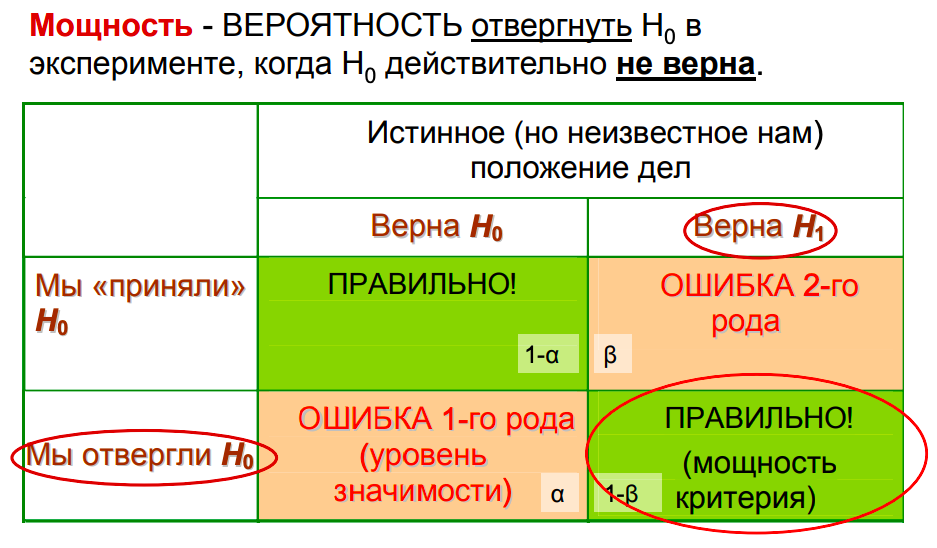

In [45]:
# b_1 показывает на сколько процентов увеличивается значения исходной при увеличении предикторов на 1 процент и  это говорит о нелинейной взаимосвязи
Image(filename='фото//output17.png')

- Мощность - ВЕРОЯТНОСТЬ отвергнуть Н0 в эксперименте, когда Н0 действительно не верна. = $1 - \beta$
- ОШИБКА 1-го рода(уровень значимости) - ВЕРОЯТНОСТЬ отвергнуть Н0 в эксперименте, когда Н0 действительно верна. =  $\alpha$
- ОШИБКА 2-го рода(уровень значимости) - ВЕРОЯТНОСТЬ отвергнуть Н1 в эксперименте, когда Н1 действительно верна.= $\beta$

**Проблемы, которые могут порадить завиисмые переменные:**
- повторные измерения:
    - снижение чувствительности теста
    - искусственное увеличение мощности теста (псевдорепликация)
- несбалансированный дизайн(давать лекарство большему кол-ву человек, чем тем кому давали плацебо)
    - искажение результатов
- кластеризация данных 
    - искажение результатов
    - Один из способов избежать кластеризации наших наблюдений — это формирование выборки способом, предполагающим, что любой элемент генеральной совокупности равновероятно может стать членом выборки.

<div class="alert alert-warning">
<h2> Смешанные регрессионные модели </h2>
</div>

`Для косвенной оценки статистической значимости предиктора можно использовать t-значение.`

Эффект — влияние независимой переменной,с помощью которой мы предсказываем зависимую переменную

Фиксированный (главный, main) эффект — влияние независимой переменной, представляющее основной интерес для исследователя (обычно варьируется. То что мы хотим варьировать
экспериментатором)
$$y = X\beta +\epsilon$$
Случайный эффект — влияние независимой переменной, не представляющее первостепенного интереса для исследователя.  То что мы не хотим варьировать
- сам испутуемый
- пол 
- возраст
- город
- социальная сеть
$$y = X\beta + Z\gamma + \epsilon$$

In [46]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# грузим датасет
url = 'https://raw.githubusercontent.com/razority/R_data/main/Exam.xlsx'
exam = pd.read_excel(url)
exam['school'] = exam['school'].map(lambda x: str(x))
exam.head(2)


,school,normexam,schgend,schavg,vr,intake,standLRT,sex,type,student
0,1,0.261324,mixed,0.166175,mid 50%,bottom 25%,0.619059,F,Mxd,143
1,1,0.134067,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd,145


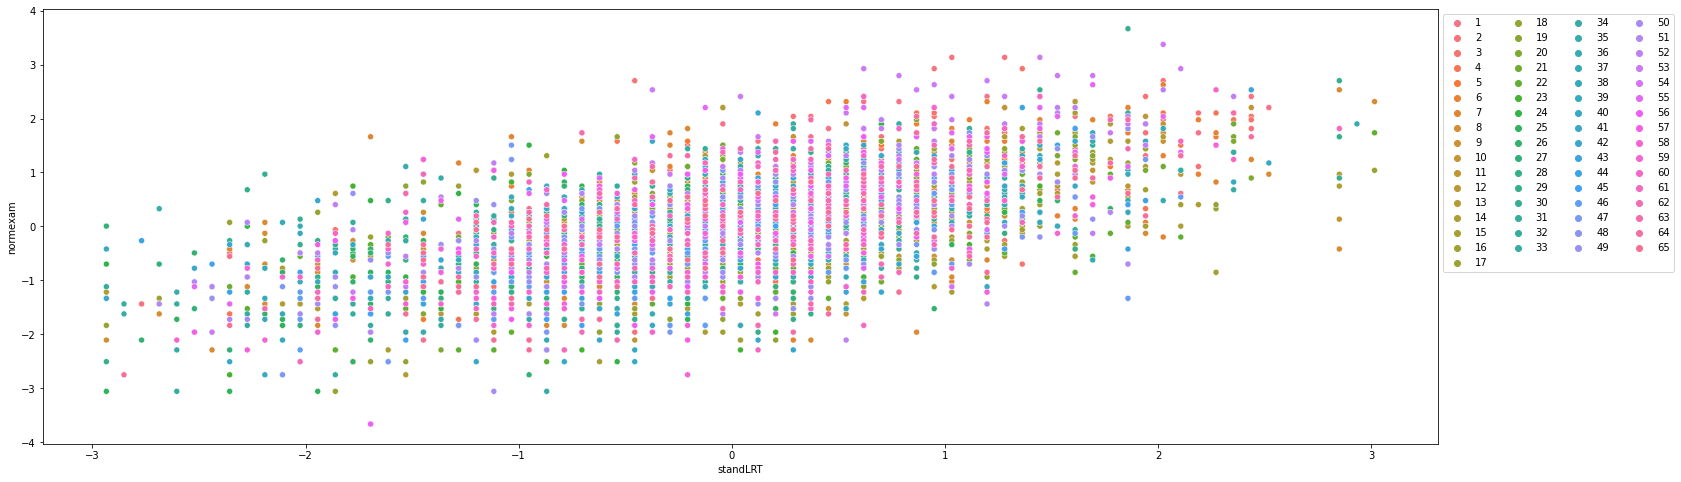

In [47]:
# рисуем диаграмму рассеяния 
fig, ax = plt.subplots(figsize=(25
                                ,8))
g = sns.scatterplot(x='standLRT', y='normexam', hue='school', data=exam)
# немного надо трансформировать легенду
h,l = g.get_legend_handles_labels()
g.legend(h,l, ncol=4, bbox_to_anchor=(1, 1), loc=2)

Для начала построим обычную регрессионную модель

In [48]:
# исследуем модель
model = smf.ols('normexam ~ standLRT', data=exam).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               normexam   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     2185.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:15:02   Log-Likelihood:                -4880.3
No. Observations:                4059   AIC:                             9765.
Df Residuals:                    4057   BIC:                             9777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0012      0.013     -0.094      0.9

In [49]:
exam['predict_usual_reg'] = model.predict()

In [50]:
exam.head()

,school,normexam,schgend,schavg,vr,intake,standLRT,sex,type,student,predict_usual_reg
0,1,0.261324,mixed,0.166175,mid 50%,bottom 25%,0.619059,F,Mxd,143,0.367184
1,1,0.134067,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd,145,0.121273
2,1,-1.723882,mixed,0.166175,mid 50%,top 25%,-1.364576,M,Mxd,142,-0.813191
3,1,0.967586,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd,141,0.121273
4,1,0.544341,mixed,0.166175,mid 50%,mid 50%,0.371105,F,Mxd,138,0.219638


<AxesSubplot:xlabel='standLRT', ylabel='normexam'>

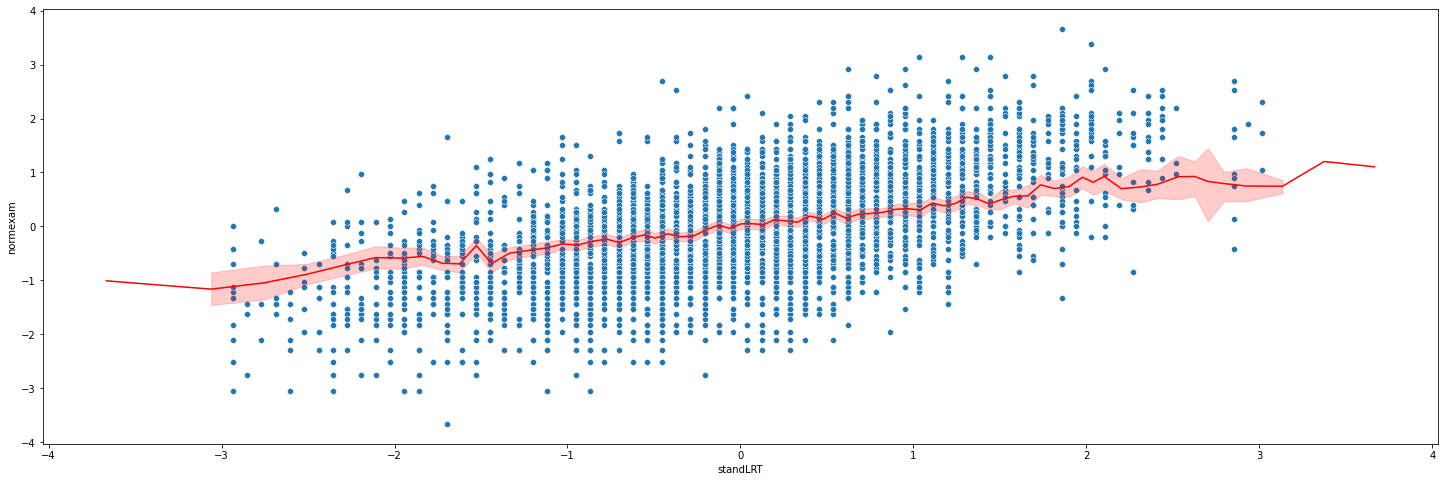

In [51]:
# добаим прогнозные значения на скаттер плот
plt.figure(figsize=(25,8))
sns.scatterplot(x='standLRT', y='normexam', data=exam)
sns.lineplot(x =exam['normexam'], y = exam['predict_usual_reg'], color='red')

Теперь построим смешанную регрессионную модель

In [52]:
# normexam ~ standLRT + (1|school)
model2 = smf.mixedlm('normexam ~ standLRT', data=exam, groups=exam['school']).fit()
print(model2.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: normexam  
No. Observations: 4059    Method:             REML      
No. Groups:       65      Scale:              0.5659    
Min. group size:  2       Log-Likelihood:     -4684.3826
Max. group size:  198     Converged:          Yes       
Mean group size:  62.4                                  
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  0.002     0.040   0.058  0.954  -0.077   0.081
standLRT   0.563     0.012  45.106  0.000   0.539   0.588
Group Var  0.094     0.025                               



In [53]:
exam['predict_model2'] = model2.predict()

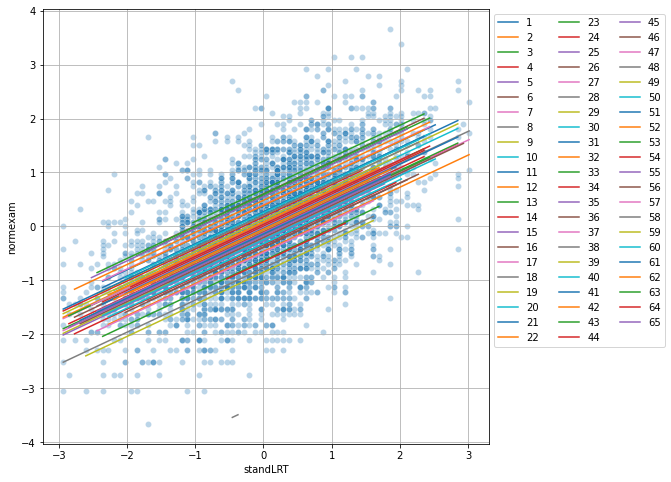

In [54]:
#  рассчитаем общий наклон для данных
X = np.array(exam.loc[:,'standLRT'])
y = np.array(exam.loc[:,'normexam'])
b1, *_ = np.polyfit(X, y, 1) #  b0 - intercept, b1 - slope
# задаём только intercept для каждой школы
plt.figure(figsize=(8,8))
sns.scatterplot(x='standLRT', y='normexam', data=exam, alpha = .3)
for school in exam['school'].unique():
    X2 = np.array(exam[exam['school'] == school].loc[:,'standLRT'])
    y2 = np.array(exam[exam['school'] == school].loc[:,'normexam'])
    b01, b00 = np.polyfit(X2, y2, 1) #  b00 - intercept for school , b01 - slope for school
    sns.lineplot(x=X2, y=b00 + b1*X2, legend = 'full', label = school)
    
plt.legend(ncol=3, bbox_to_anchor=(1., 1.))
plt.grid()

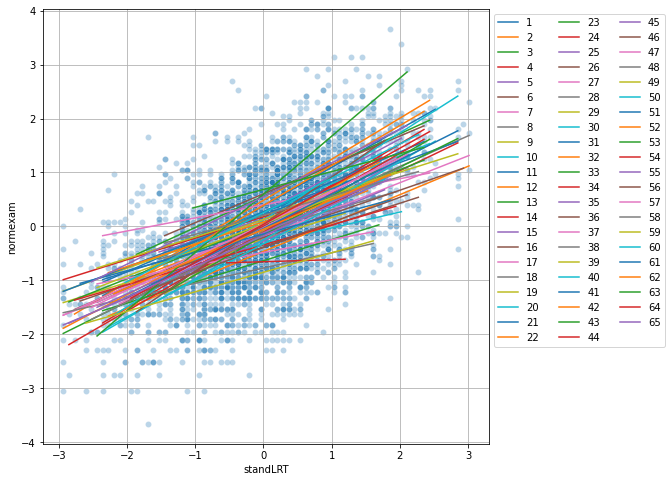

In [55]:
# если построить регресионые прямые для каждой школы отдельно 

plt.figure(figsize=(8,8))
sns.scatterplot(x='standLRT', y='normexam', data=exam, alpha = .3)

# задаём только и slope и intercept для каждой школы
for school in exam['school'].unique():
    X2 = np.array(exam[exam['school'] == school].loc[:,'standLRT'])
    y2 = np.array(exam[exam['school'] == school].loc[:,'normexam'])
    b01, b00 = np.polyfit(X2, y2, 1) #  b00 - intercept for school , b01 - slope for school
    sns.lineplot(x = X2, y= b00 + b01*X2, legend = 'full', label = school)
    
plt.legend(ncol=3, bbox_to_anchor=(1., 1.))
plt.grid()   

In [56]:
# normexam ~ standLRT + (1 + standLRT|school)
# главный эффект + случайный угловой коэффициент + случайный интерсепт 
model3 = smf.mixedlm('normexam ~ standLRT', data=exam, groups=exam['school'], re_formula="~1 + standLRT").fit()
print(model3.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   normexam  
No. Observations:    4059      Method:               REML      
No. Groups:          65        Scale:                0.5536    
Min. group size:     2         Log-Likelihood:       -4663.8002
Max. group size:     198       Converged:            Yes       
Mean group size:     62.4                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            -0.012    0.040 -0.290 0.772 -0.090  0.067
standLRT              0.557    0.020 27.588 0.000  0.517  0.596
Group Var             0.092    0.025                           
Group x standLRT Cov  0.018    0.010                           
standLRT Var          0.015    0.006                           



In [57]:
exam.head(2)

,school,normexam,schgend,schavg,vr,intake,standLRT,sex,type,student,predict_usual_reg,predict_model2
0,1,0.261324,mixed,0.166175,mid 50%,bottom 25%,0.619059,F,Mxd,143,0.367184,0.351043
1,1,0.134067,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd,145,0.121273,0.118252


Т.к. в модель включены случайные эффекты, невозможно точно оценить число степеней свободы для предикторов в модели.

Как использовать R

In [58]:
# pip install pymer4
# https://stackoverflow.com/questions/17573988/r-home-error-with-rpy2
# https://stackoverflow.com/questions/60403615/mixed-effects-logistic-regression

 # Введение в bootstrap

<div class="alert alert-warning">
<h2> Складной нож (jackknife) </h2>
</div>

**Jackknife один из методов исправления смещения (bias)**
 Обычно под bias понимают матожидание отклонения оценки параметра от истинного значения,

Если бы мы  хотели оценить (то есть получить оценку) математическое ожидание случайной переменной $X$, то  $$\hat\mu= \Sigma_{i=1}^n\hat{p_i}x_i= \Sigma_{i=1}^n\frac{X_i}{n}$$,
где $\hat\mu$ - это оценка мат ожидания, $\hat{p_i}$ - оценкк вероятности (в нашем случае частота)

мат ожидание  - это харктеристика распредления 
$$\mathbb{E} = \Sigma_{i=1}^np_ix_i$$


Дисперсия $$\mathbb{D}=\mathbb{E}(X -\mathbb{E}(X)^2) =\Sigma p_i * (x_i -\mathbb{E}(X)^2) $$

оценка дисперсии 
$$\hat{s}= \frac{\Sigma p_i * (x_i -\hat\mu)^2}{n}$$

Но $\mathbb{E}(\hat{s}) \neq \mathbb{D}(X)$ так как $\mathbb{E}(\hat{s}) = \frac{n-1}{n}*\mathbb{D}(X)$ 

Если $n$ будет сремиться к бесконечности, то  $\frac{n-1}{n}$ будет сремиться к 1, но чтобы получить несмещенную оценку для небольших выборок можно просто умножить $\hat{s}$ на $\frac{n}{n-1}$

Пусть нам нужно оценить какой то параметр распредления, тогда 
$\mathbb{E}(\hat{\Theta_i}) = \Theta  + bias = \Theta + \frac{\alpha}{n}+\frac{\beta}{n^2}+...$

jackknife поможет избавиться от самой большой ошибки (линейной) $\frac{\alpha}{n}$. Он расчитывает $\mathbb{E}(\hat{\Theta_{(i)}})$ без учета $(\hat{\Theta_{(i)}})$ 

Так же введем $\overline{\Theta} = \frac{\Sigma\hat{\Theta_{(i)}}}{n}$, тогда смещенноесть нашей оценки $\hat{bias_{jack}} = (n-1)(\overline{\Theta} - \hat{\Theta}) $

тогда оценка 
$\hat{\Theta}_{jack} = \hat{\Theta} - \hat{bias_{jack}}   $ будет гароздо лучше и не будет смещенной

Не смещенное мат ожидание $\mathbb{E}(\hat{\Theta_i}) = \Theta + \frac{\alpha}{n-1}+\frac{\beta}{(n-1)^2}+...$

Складной нож (англ. jackknife) — один из методов ресэмплинга (линейное приближением статистического бутстрэпа), используемый для оценки погрешности в статистическом выводе. Способ заключается в следующем: для каждого элемента вычисляется среднее значение выборки без учёта данного элемента, а затем — среднее всех таких значений. Для выборки из N элементов оценка получается путём вычисления среднего значения остальных N-1 элементов.

In [182]:
# функиция которая считает смещенную оценку дисперсии
def bad_var_estimator(x):
    return np.var(x, ddof=0)

In [183]:
# функиция которая считает несмещенную оценку дисперсии
def good_var_estimator(x):
    return np.var(x, ddof=1)

In [184]:
def JN_bias_correction(x, estimator):
    box_for_bad_var_estimator = []
  
    for i in range(len(x)):
        new_x = [a for j, a in enumerate(x) if j != i]
        est = estimator(new_x)
        box_for_bad_var_estimator.append(est)
#    среднее оценок
    theta_est_mean= np.mean(box_for_bad_var_estimator)
#    смещенная  оценка по полной выборке 
    theta_hat = estimator(x) 
   
    bias_jack = (n-1)*(theta_est_mean- theta_hat)
#   вернем результат без смещения
    return theta_hat - bias_jack

<AxesSubplot:>

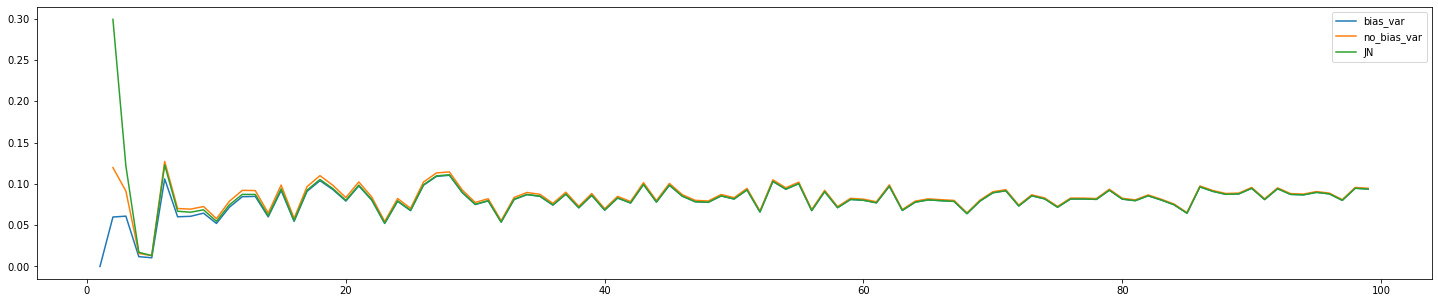

In [403]:
np.random.seed(6)
box = []
for i in range(0, 100):
    s = [random.random() for i in range(i)]
    bias_var = bad_var_estimator(s)
    no_bias_var = good_var_estimator(s)
    JN = JN_bias_correction(s, bad_var_estimator)
    box.append([bias_var, no_bias_var, JN])
pd.DataFrame(box, columns = ['bias_var','no_bias_var', 'JN'] ).plot(figsize = (25, 5))

In [195]:
# функиция которая максимум
def estimator_of_max(x):
    return max(x)

В среднем выборочное максимальное значение оказалось бы меньше реального максимума в генеральной совокупности.

<AxesSubplot:>

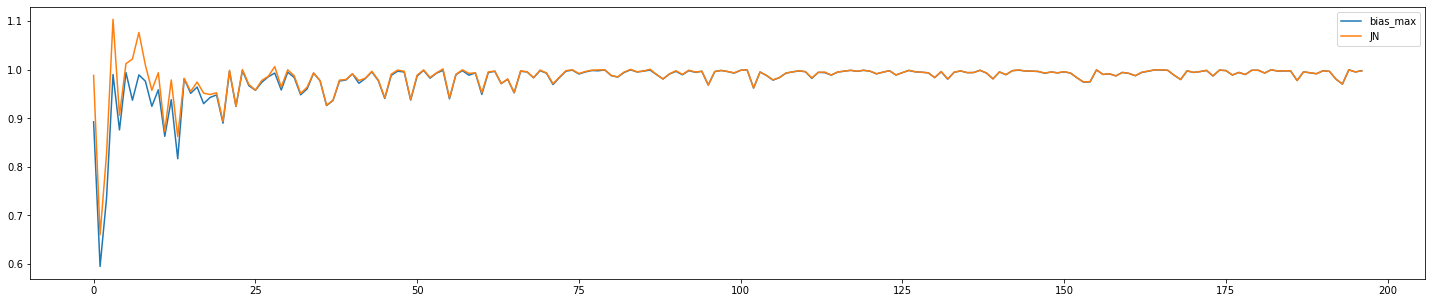

In [252]:
np.random.seed(6)
box = []
for i in range(3, 200):
    s = [random.random() for i in range(i)]
    bias_max = estimator_of_max(s)
    JN = JN_bias_correction(s, estimator_of_max)
    box.append([bias_max,  JN])
pd.DataFrame(box, columns = ['bias_max', 'JN'] ).plot(figsize = (25, 5))

<div class="alert alert-warning">
<h2> Bootstrap </h2>
</div>

Если признак в генеральной совокупности распределён нормально, то выражение
$$\large t = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{n}}}$$
где $sd$ - выборочное стандартное отклонение, $\mu$ - среднее в генеральной совокупности, $n$ – размер выборки)

  будет распределено По распределению t-Student, с $n-1$ степенями свободы

`Бутстреп не дает надежных результатов при слишком малых выборках.`

**Как работает бутстрап?**
- Продменяем распредление ГС на распредление выборки
- Делаем выборки из выборки с повторением

- как найти процентиль? 
$$\large n = \frac{P}{100}*N$$
 - n - индекс элемента 
 - P - процентиль
 - N - кол-во элементов

In [491]:
# перцентильный бутстрап
# имеет проблемы когда выборка не симметричная
def pers_bootstrap(sample_size, n, number_of_iteration):
    box = []
    np.random.seed(6)
    mu = 2
    sigma = 1
#     исходная выборка совокупность (наше предположение о распредлении)
    s = random.normal(mu, sigma, n )
#     считаем среднее по выборки из выборки размера sample_size с повторениями
    for i in range(number_of_iteration):
#         новая бутстрапировання выборка
        bootstrap = np.random.choice(s, sample_size, replace=True)
        mean_ = np.mean(bootstrap)
        box.append(mean_)
    fif, axes = plt.subplots(1, 2, figsize = (20, 5))
    
    sns.histplot(box, ax = axes[0], kde = True, stat="density") 
    sns.histplot(s, ax = axes[1], kde = True, stat="density") 
    
    axes[0].set_title(f'Бутсрап.  {number_of_iteration} итераций с выборкой по {sample_size}. Среднее {np.mean(box):.4f}')
    axes[1].set_title(f'Исходная выборка нормального распределеения на {n} значений. Среднее {np.mean(s):.4f}')
    print(f'Истинное среднее равно {np.mean(s) :.4f}')
    print(f'90% доверительный интервал среднего в ГС принадлежит [{np.percentile(box, 5, axis=0) :.4f}, {np.percentile(box, 95, axis=0):.4f}]')

Истинное среднее равно 1.9964
90% доверительный интервал среднего в ГС принадлежит [1.9911, 1.9997]


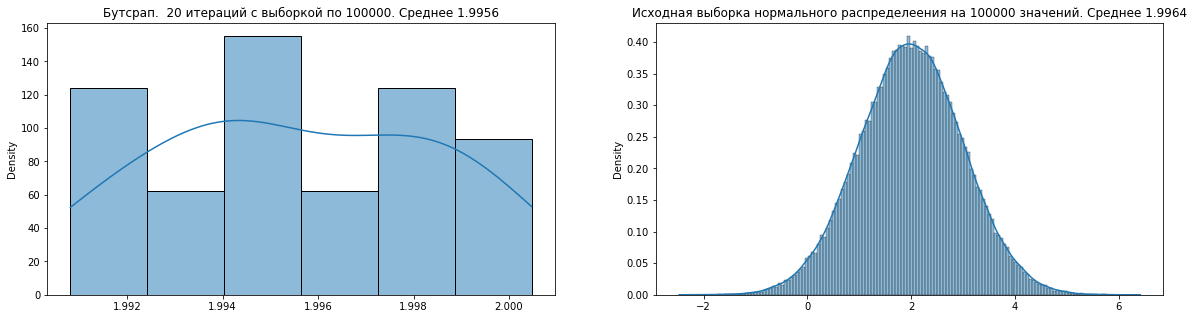

In [493]:
pers_bootstrap(sample_size = 100000, n = 100000, number_of_iteration = 20)

In [495]:
'''
В этой задаче вам необходимо оценить 95% интервал для коэффициента наклона в линейной регрессии при помощи basic bootstrap.
Напишите функцию slope_cl_boot, которая получает на вход dataframe с двумя переменными x и y произвольной длины и возвращает вектор из 
двух значений - верхней и нижней границы доверительного интервала для коэффициента наклона в модели y ~ x.

Для расчета доверительного интервала используйте симуляцию из 1000 бутстрапированных выборок.

Подсказка: как в данном случае извлекать бутсрапированную выборку? В отличии от предыдущего задания мы теперь должны случайно извлекать пары x и y,
иными словами - строки из dataframe.
'''

'\nВ этой задаче вам необходимо оценить 95% интервал для коэффициента наклона в линейной регрессии при помощи basic bootstrap.\nНапишите функцию slope_cl_boot, которая получает на вход dataframe с двумя переменными x и y произвольной длины и возвращает вектор из \nдвух значений - верхней и нижней границы доверительного интервала для коэффициента наклона в модели y ~ x.\n\nДля расчета доверительного интервала используйте симуляцию из 1000 бутстрапированных выборок.\n\nПодсказка: как в данном случае извлекать бутсрапированную выборку? В отличии от предыдущего задания мы теперь должны случайно извлекать пары x и y,\nиными словами - строки из dataframe.\n'

In [549]:
# перцентильный бутстрап
def slope_cl_boot(exam, bootstrap_cnt = 1000):
    size = exam.shape[0]
    x = exam['normexam']
    y= exam['standLRT']
    box_of_slope = []
    slope, intercept = np.polyfit(x, y, 1) #  b00 - intercept , b01 - slope
    for i in range(bootstrap_cnt): 
#         извлекаем выборки с повторением
        x = exam.sample(n = size, replace = True)['normexam']
        y= exam.sample(n = size, replace = True)['standLRT']
        b01, b00 = np.polyfit(x, y, 1) #  b00 - intercept , b01 - slope
        box_of_slope.append(b01)
    print(f'slope = {slope:.4f}')
    print(f'90% доверительный интервал slope принадлежит [{np.percentile(box_of_slope, 2.5, axis=0) :.4f}, {np.percentile(box_of_slope, 97.5, axis=0):.4f}]')
#     return box_of_slope


In [550]:
 slope_cl_boot(exam, bootstrap_cnt = 10)

slope = 0.5883
90% доверительный интервал slope принадлежит [-0.0220, 0.0174]
